# 프로젝트_Spectrogram classification 모델 구현

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 준비</a></span><ul class="toc-item"><li><span><a href="#데이터-확인" data-toc-modified-id="데이터-확인-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터 확인</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#데이터-나누기" data-toc-modified-id="데이터-나누기-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>데이터 나누기</a></span></li></ul></li><li><span><a href="#모델-구현" data-toc-modified-id="모델-구현-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>모델 구현</a></span></li><li><span><a href="#검증" data-toc-modified-id="검증-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>검증</a></span></li><li><span><a href="#마치며" data-toc-modified-id="마치며-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>마치며</a></span></li></ul></div>

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import random
from sklearn.model_selection import train_test_split

## 데이터 준비

In [2]:
data_path = os.getenv("HOME")+'/aiffel/speech_recognition/data/speech_wav_8000.npz'
speech_data = np.load(data_path)

### 데이터 확인

In [3]:
# 데이터 확인
list(speech_data)

['wav_vals', 'label_vals']

In [4]:
# 데이터 크기 확인하기
print('wav_vals shape :', speech_data["wav_vals"].shape)
print('label_vals shape :',speech_data["label_vals"].shape)
print()

# 비율 확인하기
# print(np.unique(speech_data['wav_vals'], return_counts=True))
print(np.unique(speech_data['label_vals'], return_counts=True))

wav_vals shape : (50620, 8000)
label_vals shape : (50620, 1)

(array(['down', 'go', 'left', 'no', 'off', 'on', 'right', 'silence',
       'stop', 'unknown', 'up', 'yes'], dtype='<U7'), array([4304, 4202, 4330, 4196, 4286, 4210, 4310, 3996, 4348, 4000, 4124,
       4314]))


### 데이터 전처리

In [10]:
import librosa

# wav파일을 spectrogram으로 변환하는 함수
def wav2spec(wav, fft_size=258): # spectrogram shape을 맞추기위해서 size 변형
    data = np.abs(librosa.stft(wav, n_fft=fft_size))
    return data

# wav data를 spectrum data로 변환
temp = []
for i in speech_data['wav_vals']:
    temp.append(wav2spec(i))
new_speech_data = np.array(temp)

In [11]:
# shape 확인
new_speech_data.shape

(50620, 130, 126)

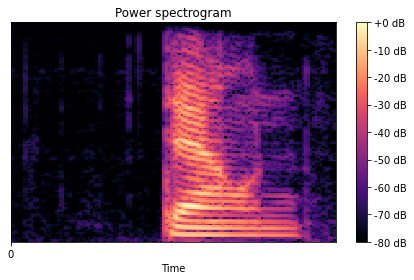

In [12]:
import librosa.display

# spectrogram을 시각화
librosa.display.specshow(librosa.amplitude_to_db(new_speech_data[0], ref=np.max), x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

In [13]:
# 데이터 전처리
# 라벨 데이터 변환해주기
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

label_value = target_list
label_value.append('unknown')
label_value.append('silence')

print('LABEL : ', label_value)

new_label_value = dict()
for i, l in enumerate(label_value):
    new_label_value[l] = i
label_value = new_label_value

print('Indexed LABEL : ', new_label_value)

LABEL :  ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'unknown', 'silence']
Indexed LABEL :  {'yes': 0, 'no': 1, 'up': 2, 'down': 3, 'left': 4, 'right': 5, 'on': 6, 'off': 7, 'stop': 8, 'go': 9, 'unknown': 10, 'silence': 11}


In [14]:
# 라벨 데이터 숫자로 변환해주기
temp = []
for v in speech_data["label_vals"]:
#     print(v[0])
    temp.append(label_value[v[0]])
label_data = np.array(temp)

label_data, len(label_data)

(array([ 3,  3,  3, ..., 11, 11, 11]), 50620)

### 데이터 나누기

In [15]:
# 데이터 분리하기
sr = 16380
train_wav, test_wav, train_label, test_label = train_test_split(new_speech_data, 
                                                                label_data, 
                                                                test_size=0.1,
                                                                stratify=label_data,
                                                                shuffle=True)
print(train_wav.shape)

train_wav = train_wav.reshape([-1, sr, 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, sr, 1])
print(train_wav.shape)
print(test_wav.shape)

(45558, 130, 126)
(45558, 16380, 1)
(5062, 16380, 1)


In [16]:
# 사이킷런의 split 함수를 이용하여 데이터 분리
from sklearn.model_selection import train_test_split

sr = 16380
train_wav, test_wav, train_label, test_label = train_test_split(new_speech_data, 
                                                                label_data, 
                                                                test_size=0.2,
                                                                shuffle=True)
print(train_wav)

train_wav = train_wav.reshape([-1, sr, 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, sr, 1])

[[[1.79391265e+00 1.14691019e+00 4.11548901e+00 ... 6.83746874e-01
   1.30383050e+00 4.20684481e+00]
  [2.99289274e+00 3.23775673e+00 2.78026915e+00 ... 2.79005909e+00
   3.17078781e+00 4.19725895e+00]
  [3.57319069e+00 1.51568580e+00 7.94007242e-01 ... 2.76182795e+00
   2.57640719e+00 1.99104869e+00]
  ...
  [2.53031068e-02 6.44144788e-02 1.24808542e-01 ... 7.91609734e-02
   2.47393429e-01 5.30695200e-01]
  [2.45236829e-02 4.56649587e-02 3.94260250e-02 ... 5.08855283e-02
   3.43737453e-01 6.11002624e-01]
  [4.85744141e-02 1.59567930e-02 1.36887953e-02 ... 1.70394173e-03
   3.48205358e-01 6.66476846e-01]]

 [[4.93464433e-02 1.37698933e-01 2.41240095e-02 ... 2.11752698e-01
   7.70308524e-02 6.46333471e-02]
  [1.07809097e-01 2.06306562e-01 2.17516124e-01 ... 1.79753602e-01
   1.46904960e-02 6.60086945e-02]
  [1.86419383e-01 1.70417011e-01 1.79759577e-01 ... 1.11235477e-01
   7.67429620e-02 4.14006412e-02]
  ...
  [7.39097642e-03 3.51780257e-03 6.78194279e-04 ... 1.15786353e-03
   5.55853

In [17]:
# 데이터셋 확인
print("train data : ", train_wav.shape)
print("train labels : ", train_label.shape)
print("test data : ", test_wav.shape)
print("test labels : ", test_label.shape)

# Hyper-parameter Setting
batch_size = 32
max_epochs = 10

# the save point
checkpoint_dir = os.getenv('HOME')+'/aiffel/speech_recognition/models/wav'
checkpoint_dir

train data :  (40496, 16380, 1)
train labels :  (40496,)
test data :  (10124, 16380, 1)
test labels :  (10124,)


'/home/ssac28/aiffel/speech_recognition/models/wav'

In [18]:
# One-hot Encoding
def one_hot_label(wav, label):
    label = tf.one_hot(label, depth=12)
    return wav, label

In [19]:
# Dataset 함수 구성
import tensorflow as tf

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_wav, train_label))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_wav, test_label))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)

<BatchDataset shapes: ((None, 16380, 1), (None, 12)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 16380, 1), (None, 12)), types: (tf.float32, tf.float32)>


## 모델 구현

In [20]:
# 모델 설계

# Dataset 함수 구성
import tensorflow as tf
from tensorflow.keras import layers

input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav = tf.keras.Model(input_tensor, output_tensor)

model_wav.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16380, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 16380, 32)         320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16380, 32)         9248      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8190, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8190, 64)          18496     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8190, 64)          36928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4095, 64)          0     

In [21]:
# optimizer 설정
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])

In [22]:
# callback 설정
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

In [23]:
# 모델 훈련
history_wav = model_wav.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback]
                    )

Epoch 1/10
1265/1265 [==============================] - ETA: 0s - loss: 0.8605 - accuracy: 0.7212
Epoch 00001: val_loss improved from inf to 0.56072, saving model to /home/ssac28/aiffel/speech_recognition/models/wav
1265/1265 [==============================] - 268s 212ms/step - loss: 0.8605 - accuracy: 0.7212 - val_loss: 0.5607 - val_accuracy: 0.8205
Epoch 2/10
1265/1265 [==============================] - ETA: 0s - loss: 0.3958 - accuracy: 0.8773
Epoch 00002: val_loss improved from 0.56072 to 0.42725, saving model to /home/ssac28/aiffel/speech_recognition/models/wav
1265/1265 [==============================] - 269s 213ms/step - loss: 0.3958 - accuracy: 0.8773 - val_loss: 0.4272 - val_accuracy: 0.8616
Epoch 3/10
1265/1265 [==============================] - ETA: 0s - loss: 0.2342 - accuracy: 0.9350
Epoch 00003: val_loss improved from 0.42725 to 0.35108, saving model to /home/ssac28/aiffel/speech_recognition/models/wav
1265/1265 [==============================] - 268s 212ms/step - loss: 0

## 검증

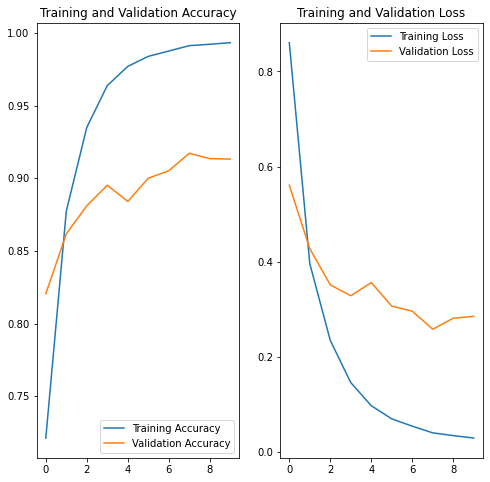

In [24]:
# 훈련 결과 시각화
import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss=history_wav.history['loss']
val_loss=history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
# checkpoint callback 함수에서 저장한 weight 불러오기
model_wav.load_weights(checkpoint_dir)

# test 데이터와 비교
results = model_wav.evaluate(test_dataset)

# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

317/317 [==============================] - 30s 96ms/step - loss: 0.2577 - accuracy: 0.9171
loss value: 0.258
accuracy value: 91.7128%


In [28]:
# 예측 데이터
inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

ipd.Audio(batch_xs.reshape(16380,), rate=16380)

# 실제 데이터가 맞는지 확인
if np.argmax(y_pred_) == batch_ys[0]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Correct!)')
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Incorrect!)')

label :  stop
y_pred: stop(Correct!)


## 마치며

노드를 진행하며 가장 어려웠고 하기 싫었던 노드가 아니였을까 생각이 든다.

아직 완전히 이해할 수는 없었지만 그래도 차근차근 코드를 익혀나가면서 음성 데이터에 대해 조금 맛 볼 수 있는 기회가 됐던 것 같다.

밀려서 노드를 끝내는 것이 아니라 밀리지 않고 바로 끝내야 될 것 같다.

다음 주는 이렇게 노드를 밀려서 제출하지 않기를 다짐하면서 이번 노드를 마칩니다. 총총...